In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
path = os.path.join(os.getcwd(), 'drive/MyDrive/nn_lab5_dataset')

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [4]:
train_generator = datagen.flow_from_directory(
    path,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    path,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

Found 681 images belonging to 5 classes.
Found 169 images belonging to 5 classes.


In [ ]:
img, label = train_generator.next()
print(img.shape)
print(label[0])
plt.imshow(img[0])
plt.show()

In [5]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

for layer in pre_trained_model.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

In [6]:
last_layer = pre_trained_model.get_layer('mixed10')
last_layer_output = last_layer.output

In [7]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

In [8]:
model = tf.keras.Model(pre_trained_model.input, output)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
22/22 [==============================] - 175s 8s/step - loss: 1.9303 - accuracy: 0.3877 - val_loss: 1.2896 - val_accuracy: 0.5385
Epoch 2/20
22/22 [==============================] - 59s 3s/step - loss: 1.0051 - accuracy: 0.6564 - val_loss: 0.7941 - val_accuracy: 0.7396
Epoch 3/20
22/22 [==============================] - 50s 2s/step - loss: 0.6501 - accuracy: 0.7680 - val_loss: 0.5858 - val_accuracy: 0.8166
Epoch 4/20
22/22 [==============================] - 47s 2s/step - loss: 0.4752 - accuracy: 0.8385 - val_loss: 0.4921 - val_accuracy: 0.8225
Epoch 5/20
22/22 [==============================] - 47s 2s/step - loss: 0.3804 - accuracy: 0.8678 - val_loss: 0.4431 - val_accuracy: 0.8402
Epoch 6/20
22/22 [==============================] - 49s 2s/step - loss: 0.3230 - accuracy: 0.8928 - val_loss: 0.4206 - val_accuracy: 0.8698
Epoch 7/20
22/22 [==============================] - 47s 2s/step - loss: 0.2784 - accuracy: 0.9104 - val_loss: 0.3936 - val_accuracy: 0.8639
Epoch 8/20
22/22 [=

In [11]:
def graph(train_data, test_data, label):
    plt.plot(train_data, label=f'train {label}')
    plt.plot(test_data, label=f'test {label}')
    plt.title(f'Training & Validation {label}')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.grid()
    plt.legend()
    plt.show()

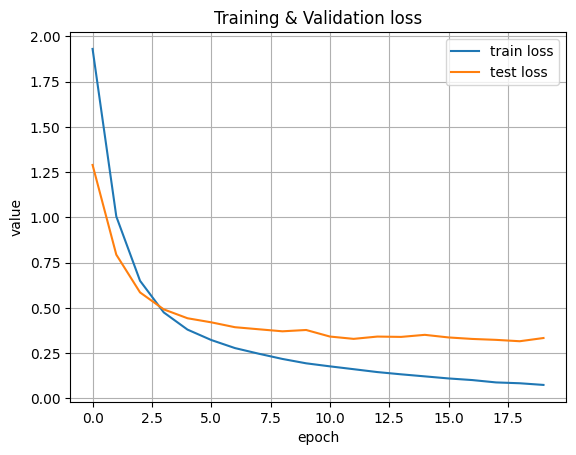

In [12]:
graph(history.history['loss'], history.history['val_loss'], 'loss')

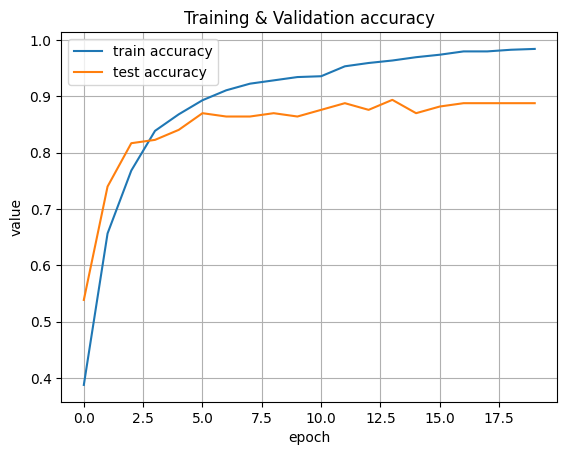

In [13]:
graph(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

In [ ]:
model.save('lab5_model')

In [ ]:
!zip -r /content/lab5-model.zip /content/lab5_model

In [ ]:
files.download("/content/lab5-model.zip")

In [ ]:
model.predict(validation_generator)

In [ ]:
files_dir = os.path.join(os.getcwd(), 'examples')
files_names = os.listdir(files_dir)
names = ['beagle', 'borzoi', 'chihuahua', 'pug', 'rottweiler']
classes = []

i = 1
for item in files_names:
  img_path = os.path.join(files_dir, item)
  img = tf.keras.utils.load_img(img_path, target_size=(150, 150))
  img = tf.keras.utils.img_to_array(img) / 255
  img = np.expand_dims(img, axis=0)
  img = np.vstack([img])
  pred = model.predict(images, batch_size=10)

  num = np.argmax(pred)
  print(f'image {i} ({files_names[i-1]}) is a {names[num]}')
  i += 1